<hr style="width:100%;height:3px;border-width:0;background-color:silver">
<h1 style="text-align:center">   
      <font color = MidnightBlue >
                Fake News Detection with NLP and LSTM 
        </font>    
</h1>   
<hr style="width:100%;height:3px;border-width:0;background-color:silver">
<center><img style = "height:550px;" src="https://images.livemint.com/rf/Image-621x414/LiveMint/Period2/2018/05/05/Photos/Processed/fakereal-k2QC--621x414@LiveMint.jpg"></center>
<br>
<h2><font color = MidnightBlue>What is "Fake News"?</font></h2>
<p>“Fake news” is a term that has come to mean different things to different people. At its core, we are defining “fake news” as those news stories that are false: the story itself is fabricated, with no verifiable facts, sources or quotes. Sometimes these stories may be propaganda that is intentionally designed to mislead the reader, or may be designed as “clickbait” written for economic incentives (the writer profits on the number of people who click on the story). In recent years, fake news stories have proliferated via social media, in part because they are so easily and quickly shared online.</p>
<h2><font color = MidnightBlue>About Dataset</font></h2>
<p>This data set consists of 40000 fake and real news. Our goal is to train our model to accurately predict whether a particular piece of news is real or fake. Fake and real news data are given in two separate data sets, with each data set consisting of approximately 20000 articles.</p>
<h2><font color = MidnightBlue>Content:</font></h2>
<br>
 
1. [Import Libraries](#1)
1. [Load and Check Data](#2)
1. [Visualization](#3)
1. [Data Cleaning](#4)
    * [Removal of HTML Contents](#5)
    * [Removal of Punctuation Marks and Special Characters](#6)
    * [Removal of Stopwords](#7)
    * [Lemmatization](#8)
    * [Perform it for all the examples](#9)  
1. [N-Gram Analysis](#10)
    * [Unigram Analysis](#11)
    * [Bigram Analysis](#12)
    * [Trigram Analysis](#13)
1. [Modeling](#14)
    * [Train - Test Split](#15)
    * [Tokenizing](#16)
    * [Training LSTM Model](#17)
    * [Analysis After Training](#18) 

<a id = 1></a>
<h1><font color = MidnightBlue>Import Libraries</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/fake-news-dataset/xy_train.csv


<a id = 2></a>
<h1><font color = MidnightBlue>Load and Check Data</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [61]:
data = pd.read_csv('/kaggle/input/fake-news-dataset/xy_train.csv')
test_data = pd.read_csv('/kaggle/input/fake-news-dataset-test/x_test.csv')

In [5]:
data.head()

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [6]:
data.head()

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [7]:
data.isnull().sum()

id       0
text     0
label    0
dtype: int64

<a id = 3></a>
<h1><font color = MidnightBlue>Visualization</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [8]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

**1.Count of Fake and Real Data**

In [9]:
print(data["label"].value_counts())

0    32172
1    27596
2      232
Name: label, dtype: int64


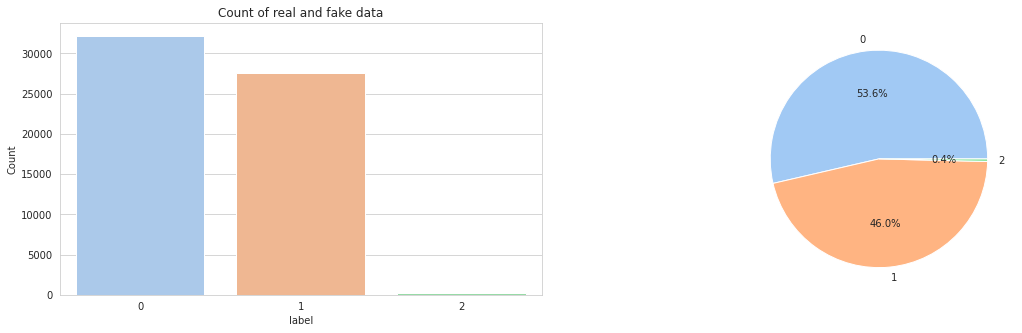

In [10]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.label,ax=ax[0]);
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("label")
g2 = plt.pie(data["label"].value_counts().values,explode=[0,0,0],
             labels=data.label.value_counts().index, 
             autopct='%1.1f%%')
fig.show()

> **OBSERVATION**: 232 sample have label = 2 (noisy), i will drop them

In [11]:
data = data[data["label"] != 2]

**2.Distribution of The Subject According to Real and Fake Data**

<a id = 4></a>
<h1><font color = MidnightBlue>Data Cleaning</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [12]:
data = data.drop('id', axis = 1)

In [13]:
first_text = data.text[0]
first_text

'A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Seeing another person who鈥檚 also in need, you should just naturally be like, 鈥業 want to help that person.鈥?\t0.84\t1\t0\t0\nNeoMegaRyuMKII\tdenmark just trolled trump with a bus watch what happens when it moves\t1489962542.0\tarchive.is\tTrue\t60cu90\thttps://external-preview.redd.it/s8HQxoWDwn2pt3eeBjIqetmGxvVMBBxaD93W08lGZrs.jpg?width=320&crop=smart&auto=webp&s=46f0ad18132126cab9823da4f3a6d6ec3a281bb2\t\t5.0\t36\tsavedyouaclick\tDenmark Just Trolled Trump With A Bus. Watch What Happens When It Moves | Back wheels look like eyes that spin crazily as the bus moves (saved a click + short video that goes into slow motion (video mirror in comments since archive removed it))\t0.92\t0\t2\t5\natbthefirst\tyoung man theres no need to feel down\t1429563057.0\t\tTrue\tcqiw655\thttp://i.imgur.com/rxTKm4U.jpg\t338ute\t\t6\tpsbattle_artwork\tYoung man, there\'s no need to feel down\t\t0\t2\t4\nbeosronlto

<a id = 6></a>
<h2><font color = MidnightBlue>Removal of Punctuation Marks and Special Characters</font></h2>

**Let's now remove everything except uppercase / lowercase letters using Regular Expressions.**

In [14]:
first_text = re.sub('\[[^]]*\]', ' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'a group of friends began to volunteer at a homeless shelter after their neighbors protested   seeing another person who   also in need  you should just naturally be like     want to help that person               neomegaryumkii denmark just trolled trump with a bus watch what happens when it moves              archive is true   cu   https   external preview redd it s hqxowdwn pt eebjiqetmgxvvmbbxad  w  lgzrs jpg width     crop smart auto webp s   f ad        cab    da f a d ec a   bb          savedyouaclick denmark just trolled trump with a bus  watch what happens when it moves   back wheels look like eyes that spin crazily as the bus moves  saved a click   short video that goes into slow motion  video mirror in comments since archive removed it              atbthefirst young man theres no need to feel down               true cqiw    http   i imgur com rxtkm u jpg    ute    psbattle artwork young man  there s no need to feel down        beosronlto my onion ring chimp              imgu

<a id = 7></a>
<h2><font color = MidnightBlue>Removal of Stopwords</font></h2>

**Let's remove stopwords like is,a,the... Which do not offer much insight.**

In [15]:
nltk.download("stopwords")   
from nltk.corpus import stopwords  

# we can use tokenizer instead of split
first_text = nltk.word_tokenize(first_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]
first_text[:10]

['group',
 'friends',
 'began',
 'volunteer',
 'homeless',
 'shelter',
 'neighbors',
 'protested',
 'seeing',
 'another']

<a id = 8></a>
<h2><font color = MidnightBlue>Lemmatization</font></h2>

**Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.**

In [17]:
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text] 

first_text = " ".join(first_text)
first_text

'group friend began volunteer homeless shelter neighbor protested seeing another person also need naturally like want help person neomegaryumkii denmark trolled trump bus watch happens move archive true cu http external preview redd hqxowdwn pt eebjiqetmgxvvmbbxad w lgzrs jpg width crop smart auto webp f ad cab da f ec bb savedyouaclick denmark trolled trump bus watch happens move back wheel look like eye spin crazily bus move saved click short video go slow motion video mirror comment since archive removed atbthefirst young man there need feel true cqiw http imgur com rxtkm u jpg ute psbattle artwork young man need feel beosronlto onion ring chimp imgur com true s x http external preview redd muewxgrxj y iypjqibixpidxr woyyln e xe jpg width crop smart auto webp f f bf aa dab dd c ed pareidolia onion ring chimp food s eat image description imgur com true mnjdi http external preview redd llesgqetbjasylhffuw ckmfbkdr wza ldvdxpoog jpg width crop smart auto webp cb c cf f b db f f subredd

<a id = 9></a>
<h2><font color = MidnightBlue>Perform it for all the examples</font></h2>
<b>We performed the steps for a single example. Now let's perform it for all the examples in the data.</b>

In [18]:
#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

#Total function
def cleaning(text):
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

#Apply function on text column
data['text']=data['text'].apply(cleaning)

In [19]:
data.head()

,text,label
0,group friend began volunteer homeless shelter ...,0
1,british prime minister theresa may nerve attac...,0
2,goodyear released kit allows p brought heel ht...,0
3,happy birthday bob barker price right host lik...,0
4,obama nation innocent cop unarmed young black ...,0


<h2><b>Let's make some visualization with new data.</b></h2>

<h3><b>1.WordCloud for Real News </b></h3>

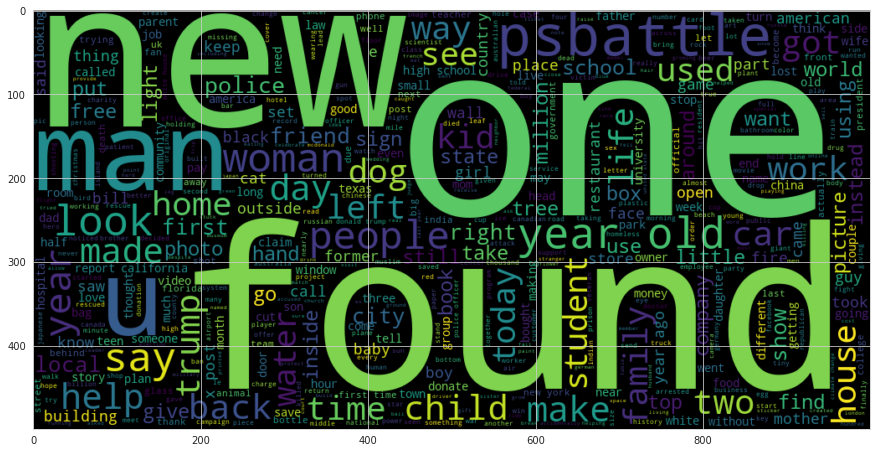

In [20]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

<h3><b>2.WordCloud for Fake News </b></h3>

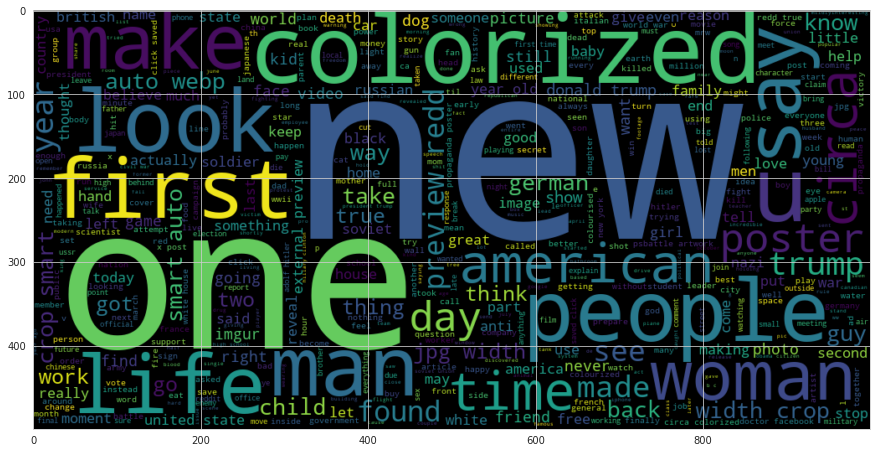

In [21]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

<h3><b>Number of words in each text</b></h3>

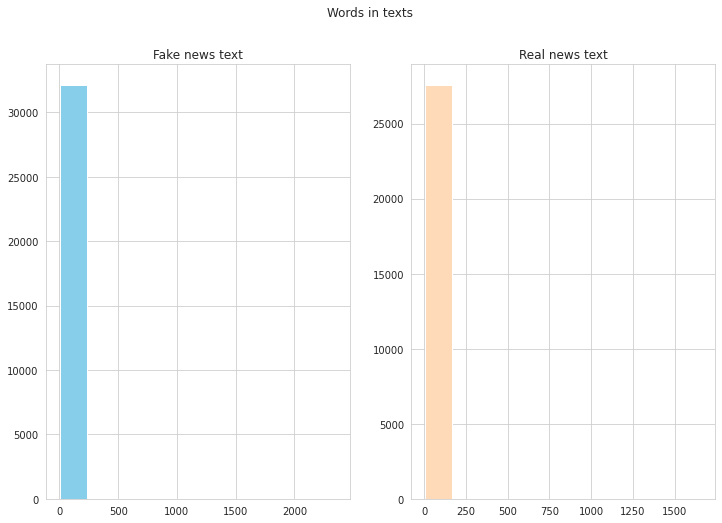

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['label']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['label']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

**The number of words seems to be a bit different. {} words  are most common in real news category while around {} words are most common in fake news category.**

<a id = 10></a>
<h2><font color = MidnightBlue>N-Gram Analysis</font></h2>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">
<center><img style = "height:450px;" src="https://devopedia.org/images/article/219/7356.1569499094.png"></center>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [23]:
texts = ' '.join(data['text'])

In [24]:
string = texts.split(" ")

In [25]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

<a id = 11></a>
<h2><font color = MidnightBlue>Unigram Analysis</font></h2>

      word  count
0  (year,)   4120
1   (one,)   3279
2   (new,)   2985
3  (like,)   2949
4   (man,)   2704


<AxesSubplot:xlabel='count', ylabel='word'>

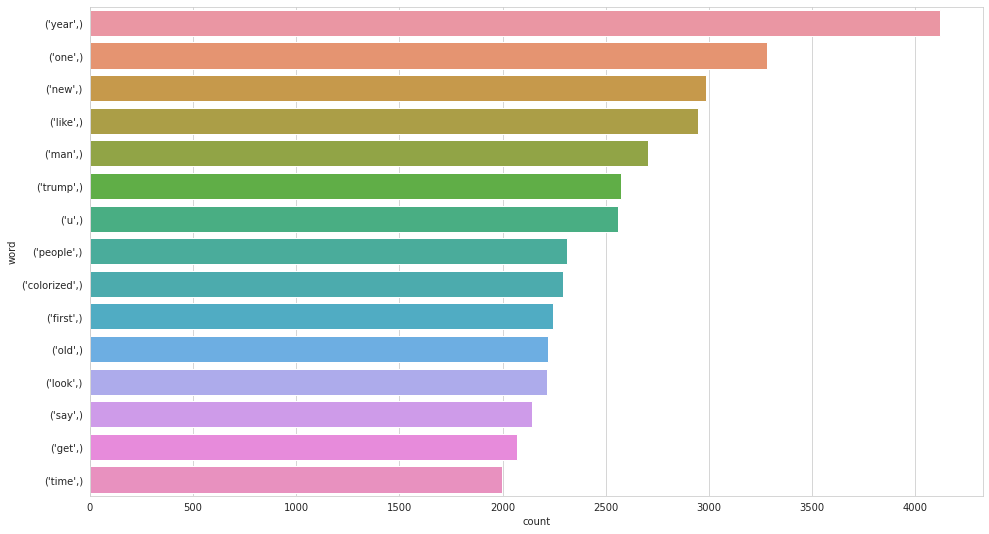

In [26]:
draw_n_gram(string,1)

<a id = 12></a>
<h2><font color = MidnightBlue>Bigram Analysis</font></h2>

              word  count
0     (look, like)   1311
1      (year, old)   1258
2  (donald, trump)    667
3    (crop, smart)    633
4  (preview, redd)    633


<AxesSubplot:xlabel='count', ylabel='word'>

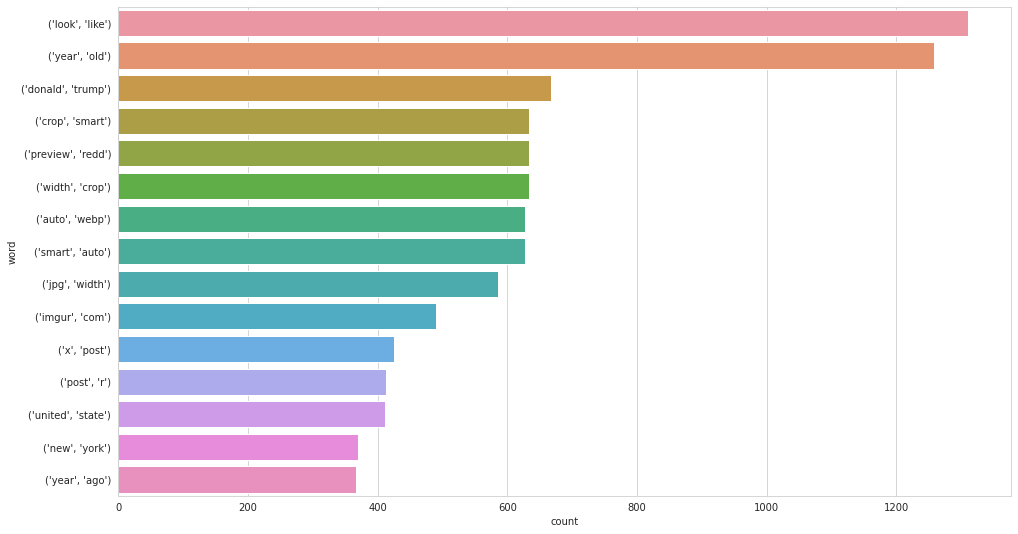

In [27]:
draw_n_gram(string,2)

<a id = 13></a>
<h2><font color = MidnightBlue>Trigram Analysis</font></h2>

                   word  count
0  (width, crop, smart)    633
1   (crop, smart, auto)    628
2   (smart, auto, webp)    628
3    (jpg, width, crop)    586
4          (x, post, r)    390


<AxesSubplot:xlabel='count', ylabel='word'>

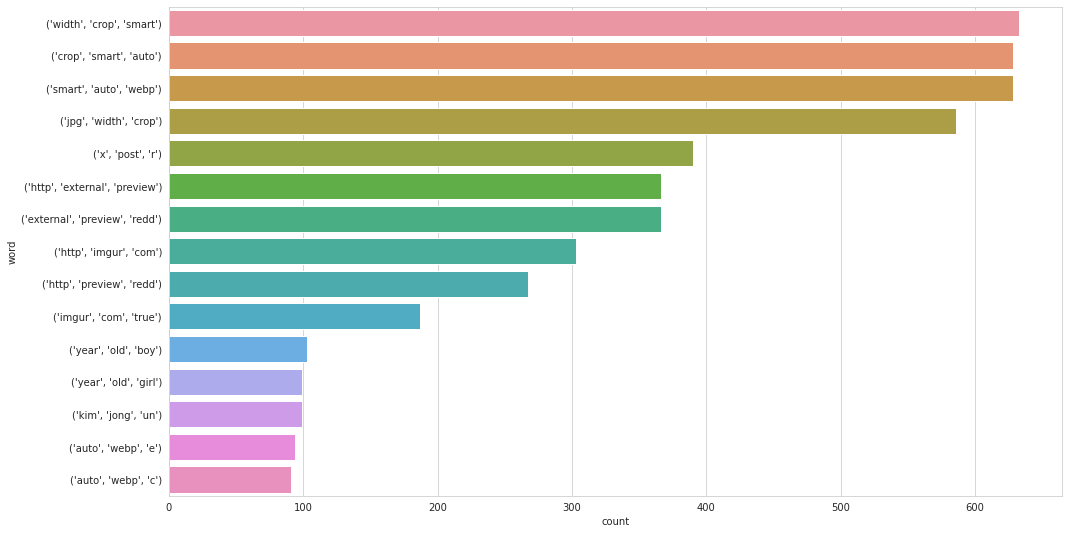

In [28]:
draw_n_gram(string,3)

<a id = 14></a>
<h2><font color = MidnightBlue>Modeling</font></h2>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

<a id = 15></a>
<h2><font color = MidnightBlue>Train Test Split</font></h2>

In [57]:
X_train, X_val, y_train, y_val = train_test_split(data['text'], data['label'], random_state=0)

<a id = 16></a>
<h2><font color = MidnightBlue>Tokenizing</font></h2>

* **Tokenizing Text -> Repsesenting each word by a number**

* **Mapping of orginal word to number is preserved in word_index property of tokenizer**

<h3><b>Lets keep all news to 300, add padding to news with less than 300 words and truncating long ones </b></h3>

In [30]:
max_features = 10000
maxlen = 300

In [31]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [58]:
tokenized_test = tokenizer.texts_to_sequences(X_val)
X_val = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [62]:
tokenized_test = tokenizer.texts_to_sequences(test_data['text'])
test_data = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

<a id = 17></a>
<h2><font color = MidnightBlue>Training LSTM Model</font></h2>

In [38]:
batch_size = 256
epochs = 10
embed_size = 100

In [39]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [41]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/10
123/123 [==============================] - 376s 3s/step - loss: 0.6917 - accuracy: 0.5240 - val_loss: 0.6777 - val_accuracy: 0.5570
Epoch 2/10
123/123 [==============================] - 365s 3s/step - loss: 0.6634 - accuracy: 0.5777 - val_loss: 0.6344 - val_accuracy: 0.6125
Epoch 3/10
123/123 [==============================] - 360s 3s/step - loss: 0.6329 - accuracy: 0.5994 - val_loss: 0.6182 - val_accuracy: 0.6026
Epoch 4/10
123/123 [==============================] - 359s 3s/step - loss: 0.6109 - accuracy: 0.6256 - val_loss: 0.6113 - val_accuracy: 0.6188
Epoch 5/10
123/123 [==============================] - 360s 3s/step - loss: 0.6067 - accuracy: 0.6317 - val_loss: 0.6039 - val_accuracy: 0.6321
Epoch 6/10
123/123 [==============================] - 360s 3s/step - loss: 0.5947 - accuracy: 0.6457 - val_loss: 0.6019 - val_accuracy: 0.6399
Epoch 7/10
123/123 [==============================] - 360s 3s/step - loss: 0.5886 - accuracy: 0.6593 - val_loss: 0.5940 - val_accuracy: 0.6454

<a id = 18></a>
<h2><font color = MidnightBlue>Analysis After Training </font></h2>

In [42]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1401/1401 [==============================] - 140s 100ms/step - loss: 0.5260 - accuracy: 0.7195
Accuracy of the model on Training Data is -  71.95377945899963 %
467/467 [==============================] - 46s 99ms/step - loss: 0.5480 - accuracy: 0.6978
Accuracy of the model on Testing Data is -  69.78316307067871 %


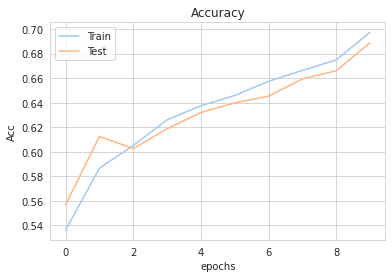

In [43]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

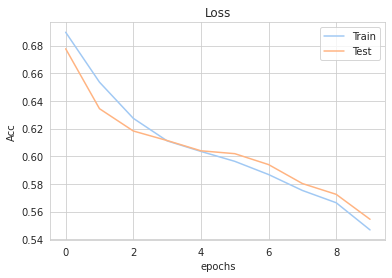

In [44]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [45]:
pred = model.predict_classes(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      8081
           1       0.67      0.68      0.67      6861

    accuracy                           0.70     14942
   macro avg       0.70      0.70      0.70     14942
weighted avg       0.70      0.70      0.70     14942



In [50]:
id_col= pd.read_csv('/kaggle/input/fake-news-dataset-test/x_test.csv')['id']
id_col

0            0
1            1
2            2
3            3
4            4
         ...  
59146    59146
59147    59147
59148    59148
59149    59149
59150    59150
Name: id, Length: 59151, dtype: int64

In [66]:
prediction = model.predict_proba(test_data)
prediction

array([[0.29570943]], dtype=float32)

In [70]:
prediction.reshape(-1).shape

(59151,)

In [72]:
submission = pd.DataFrame()
submission['id'] = id_col
submission['label'] = prediction.reshape(-1)
submission.to_csv('sample_submission_walkthrough_LSTM.csv', index=False)